## Example analysis of passivity in closed and open loop (head embedded, tail free)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import glob


In [25]:
#Load data (you can download example files from https://drive.google.com/drive/folders/1OHFI0rXvt7BeKJ-etQb5GRnMG3KcL7vz?usp=sharing)
allFishDir = r'/Fig1/control'
fishList = sorted(glob.glob(allFishDir + '//*'))

In [26]:
newFishList = []
for fishDir in fishList:
    if not ('.ini' in fishDir):
        newFishList.append(fishDir)

fishList = newFishList
for fishDir in fishList:
    if not ('.ini' in fishDir):
        fish_dir = fishDir + '//rawdata'
        fileListHT = sorted(glob.glob(fish_dir+'//*head_tail_data.npz'))
        fileListStim = sorted(glob.glob(fish_dir+'//*stimulus_data.npz'))

In [27]:
fish_data = []
fish_stim = []
for fishDir in fishList:
    if not ('.ini' in fishDir):
        fish_dir = fishDir + '//rawdata'
        fileListHT = sorted(glob.glob(fish_dir+'//*head_tail_data.npz'))
        #print(fileListHT)
        fileListStim = sorted(glob.glob(fish_dir+'//*stimulus_data.npz'))
        #print(fileListStim)
    trial = {}
    trial['tail_angle'] = []
    trial['bout'] = []
    trial['time'] = []
    trial['tail_vigor'] = []
    stim = {}
    stim['start_times'] = []
    for file in fileListHT:
        data = np.load(file)
        trial['tail_angle'].append(data['tail_tip_deflection'])
        trial['bout'].append(data['tail_bout_information'])
        trial['time'].append(data['camera_time'])
        trial['tail_vigor'].append(data['tail_vigor'])

    for file in fileListStim:
        stimdata = np.load(file)
        stim['start_times'].append(stimdata['stimulus_start_times'])
        
    fish_data.append(trial)
    fish_stim.append(stim)
    

In [28]:
fps_estimate = 10000/(trial['time'][0][10000] - trial['time'][0][0])
print(fps_estimate)

89.96390962819349


##### Currently assumes following protocol: 60s rest, 60s closed loop, 120 open loop

<Figure size 2100x1300 with 0 Axes>

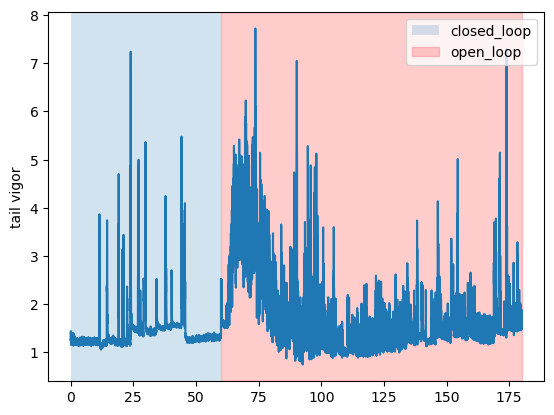

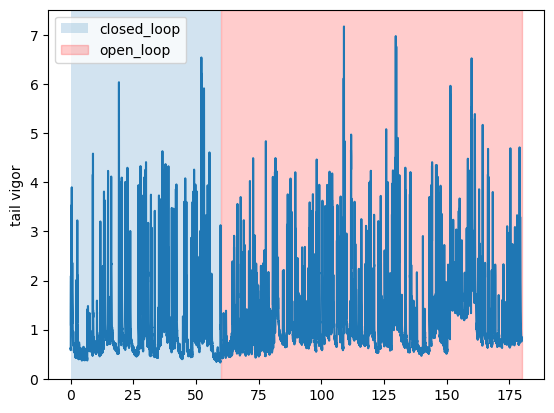

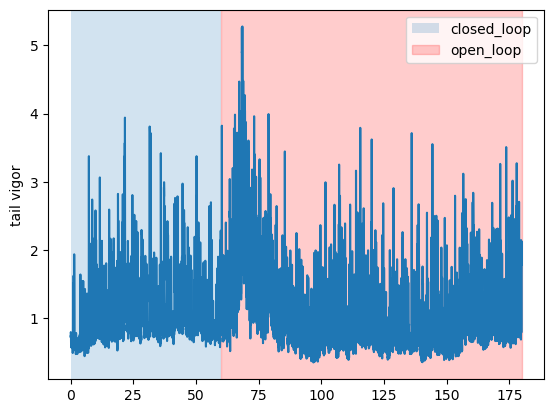

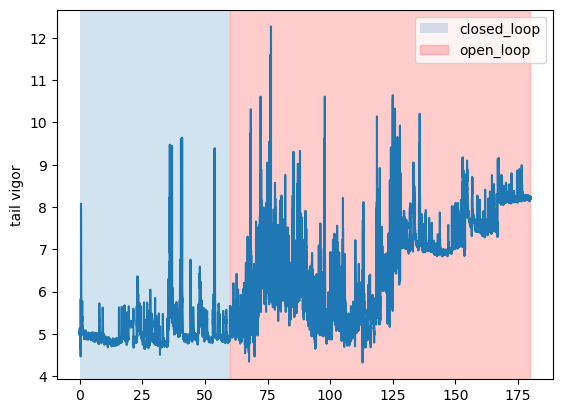

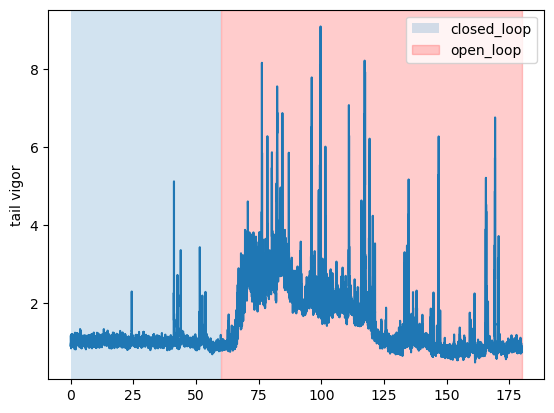

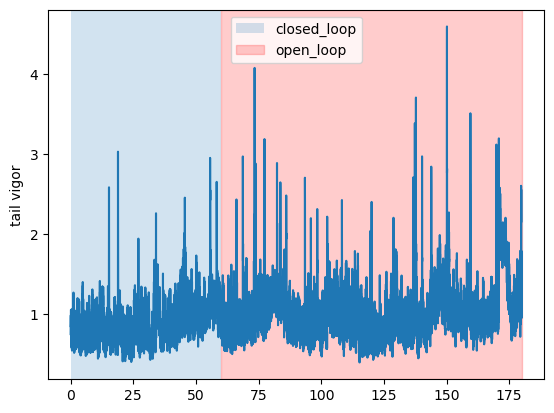

In [29]:
all_cl_ol = []
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    all_cl_ol.append(cl_ol)
    plt.figure()
    plt.plot(range(len(cl_ol))/fps_estimate,cl_ol)
    plt.axvspan(0, len(mean_cl_trial)/fps_estimate, alpha=0.2, label='closed_loop')
    plt.axvspan(len(mean_cl_trial)/fps_estimate,len(cl_ol)/fps_estimate, alpha=0.2, color = 'r',label='open_loop')
    plt.legend()
    plt.ylabel('tail vigor')
    #plt.ylim(0,100)
    avg_vigors[j,0] = np.mean(mean_cl_trial)
    avg_vigors[j,1] = np.mean(mean_ol_trial)
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

In [30]:
a = []
for i in range(len(all_cl_ol)):
    a.append(len(all_cl_ol[i]))
trialLen = np.min(a)
print(trialLen)

16187


In [31]:
allMeanSwimVigors = np.zeros([len(all_cl_ol),trialLen])
for i in range(len(all_cl_ol)):
    allMeanSwimVigors[i] = all_cl_ol[i][0:trialLen]

In [32]:
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
cl_ol_std_allfish = []
angle_allfish = []
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    cl_ol_trials = np.zeros([numTrials,cl_ind_length + ol_ind_length])
    cl_ol_std = np.zeros(np.shape(cl_ol_trials))
    post = 45
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        cl_ol_trials[i] = np.concatenate((cl_trials[i],ol_trials[i]))
        cl_ol_app = np.append(cl_ol_trials[i],np.zeros([1,post]))
        for k in range(len(cl_ol_trials[i])):
            cl_ol_std[i,k] = np.std(cl_ol_app[k:(k+post)])
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    cl_ol_std_allfish.append(cl_ol_std)
    angle_allfish.append(cl_ol_trials)
    
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

<Figure size 2100x1300 with 0 Axes>

In [33]:
from scipy.signal import find_peaks

In [34]:
ft_swim_times = {}
ft_swim_times['swims'] = []
ft_swim_times['times'] = []
for i in range(numFish):
    t_swim_times = []
    swim_raster = np.zeros(np.shape(cl_ol_std_allfish[i]))
    for j in range(len(cl_ol_std_allfish[i])):
        swims, mags = find_peaks(cl_ol_std_allfish[i][j], height = 0.5, distance = 90)
        t_swim_times.append(swims)
        swim_raster[j][swims] = mags['peak_heights']
    ft_swim_times['swims'].append(swim_raster)
    ft_swim_times['times'].append(t_swim_times)

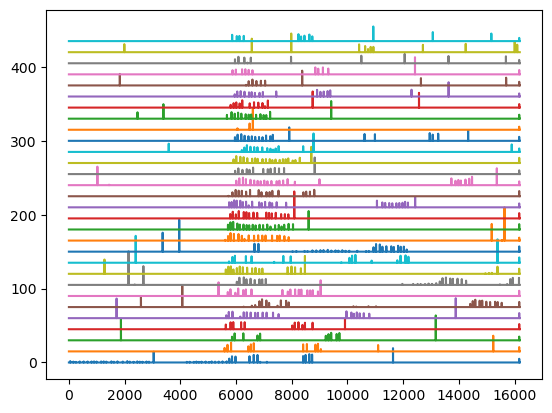

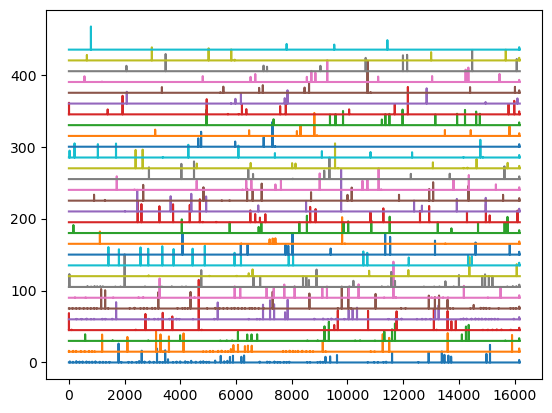

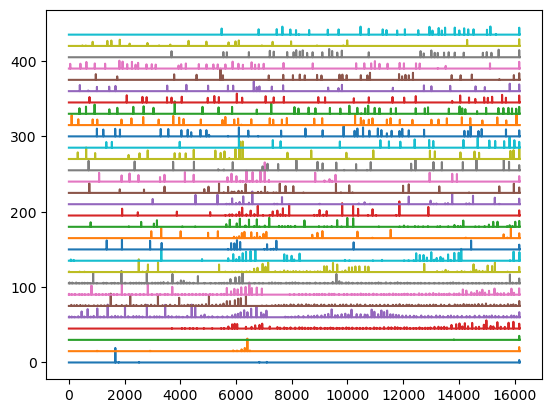

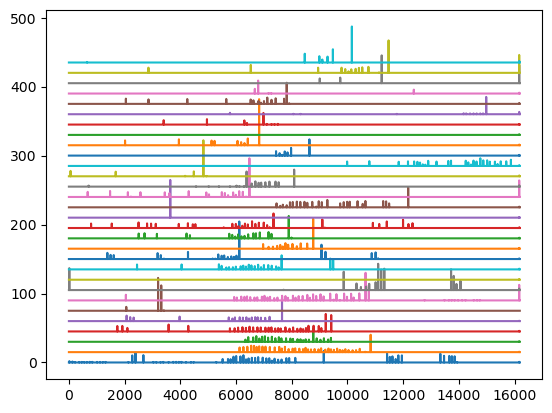

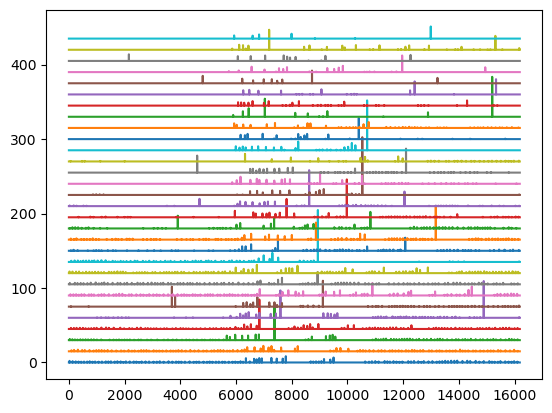

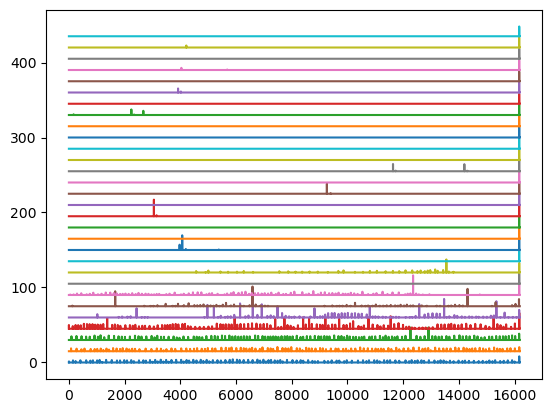

In [35]:
for i in range(len(ft_swim_times['swims'])):
    plt.figure()
    for j in range(len(ft_swim_times['swims'][i])):
        plt.plot(ft_swim_times['swims'][i][j] + 15 * j)

In [534]:
#Save summary files
np.save(r'control.csv',ft_swim_times)

## Summary data analysis

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sb

In [37]:
#procDir = r'G:\.shortcut-targets-by-id\13A6Oyf4JZWnw8zyZM4-rawIBB1jCWrUX\behavior01112024\processed'
procDir = r'/Fig1/processed'
allExptDir_c = procDir + '//control'
allExptDir_k = procDir + '//ket'
fishList_c = glob.glob(allExptDir_c + '//*.npy')
fishList_k = glob.glob(allExptDir_k + '//*.npy')
print(fishList_c)
print(fishList_k)

['/Users/marc/Library/CloudStorage/GoogleDrive-mduqueramirez@g.harvard.edu/My Drive/Papers/duque_et_al_ketamine/alex_marc_pooled/Fig1//control/control.npy']
['/Users/marc/Library/CloudStorage/GoogleDrive-mduqueramirez@g.harvard.edu/My Drive/Papers/duque_et_al_ketamine/alex_marc_pooled/Fig1//ket/ket.npy']


In [38]:
pooled_ctrl = {}
pooled_ctrl['swims'] = []
pooled_ctrl['times'] = []
pooled_ket = {}
pooled_ket['swims'] = []
pooled_ket['times'] = []
for fish in fishList_c:
    data = np.load(fish,allow_pickle=True).item()
    for i in range(len(data['swims'])):
        pooled_ctrl['swims'].append(data['swims'][i])
        pooled_ctrl['times'].append(data['times'][i])
        
for fish in fishList_k:
    data = np.load(fish,allow_pickle=True).item()
    for i in range(len(data['swims'])):
        pooled_ket['swims'].append(data['swims'][i])
        pooled_ket['times'].append(data['times'][i])

In [39]:
mean_swims_cl_k = []
mean_swims_cl_c = []
for i in range(len(pooled_ket['times'])):
    frame_num = len(pooled_ket['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/2)
    else:
        cutoff = int(frame_num/3)
    numswims = []
    for j in range(len(pooled_ket['times'][i])):
        cl_swims = np.where(pooled_ket['times'][i][j] <= cutoff)[0]
        numswims.append(len(cl_swims))
    mean_swims_cl_k.append(np.median(numswims))
    
for i in range(len(pooled_ctrl['times'])):
    frame_num = len(pooled_ctrl['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/2)
    else:
        cutoff = int(frame_num/3)
    numswims = []
    for j in range(len(pooled_ctrl['times'][i])):
        cl_swims = np.where(pooled_ctrl['times'][i][j] <= cutoff)[0]
        numswims.append(len(cl_swims))
    mean_swims_cl_c.append(np.median(numswims))

In [40]:
acceptable_fish_k = []
accept_thresh = 0
for i in range(len(mean_swims_cl_k)):
    if(mean_swims_cl_k[i] >accept_thresh):
        acceptable_fish_k.append(i)

        
acceptable_fish_c = []
for i in range(len(mean_swims_cl_c)):
    if(mean_swims_cl_c[i] >accept_thresh):
        acceptable_fish_c.append(i)


filtered_pooled_ket = {}
filtered_pooled_ket['swims'] = []
filtered_pooled_ket['times'] = []
filtered_pooled_ctrl = {}
filtered_pooled_ctrl['swims'] = []
filtered_pooled_ctrl['times'] = []
for i in acceptable_fish_k:
    filtered_pooled_ket['swims'].append(pooled_ket['swims'][i])
    filtered_pooled_ket['times'].append(pooled_ket['times'][i])
    
for i in acceptable_fish_c:
    filtered_pooled_ctrl['swims'].append(pooled_ctrl['swims'][i])
    filtered_pooled_ctrl['times'].append(pooled_ctrl['times'][i])

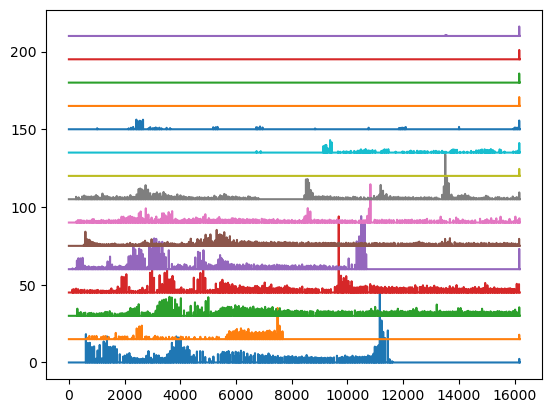

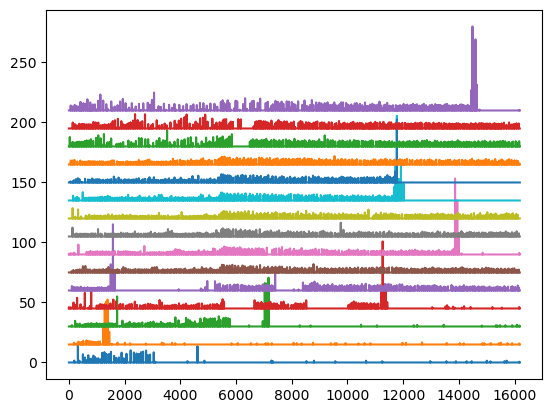

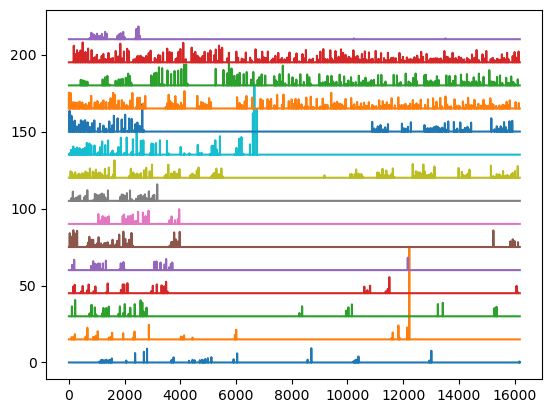

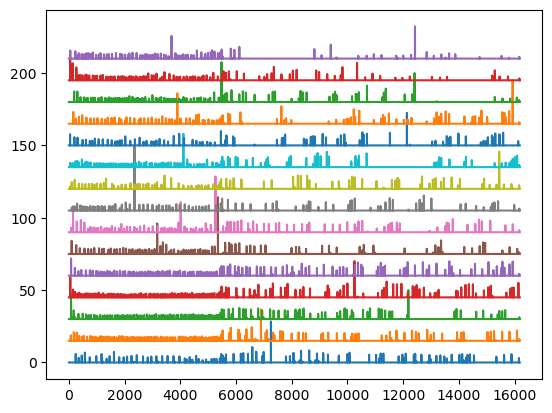

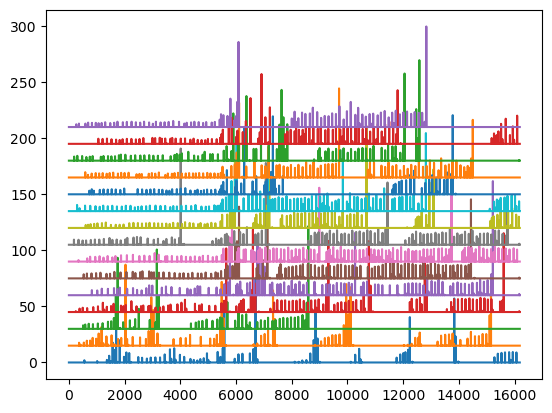

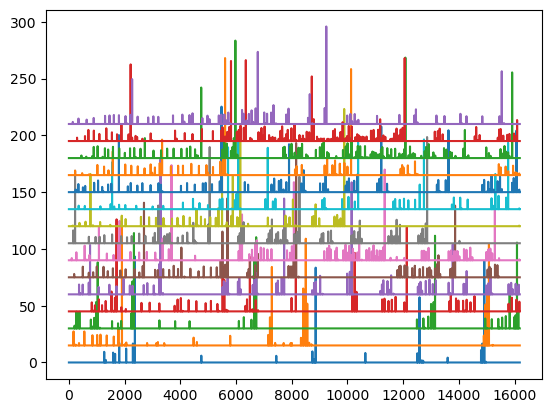

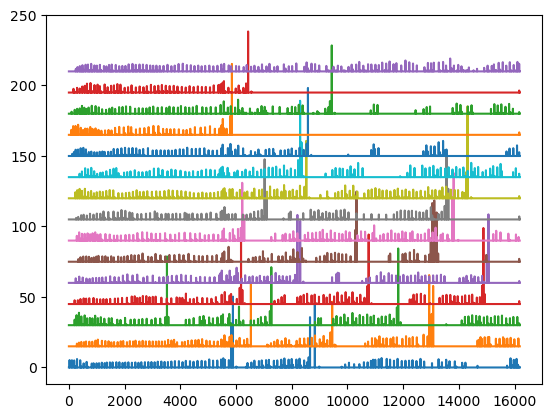

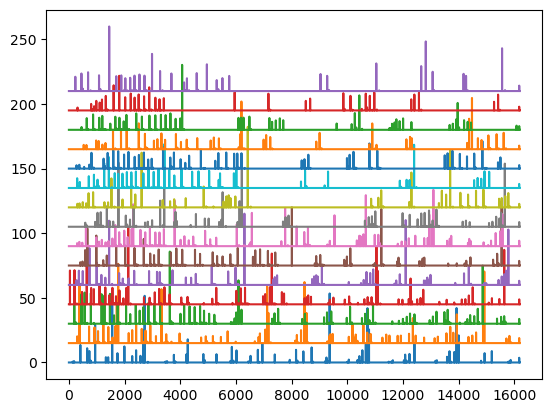

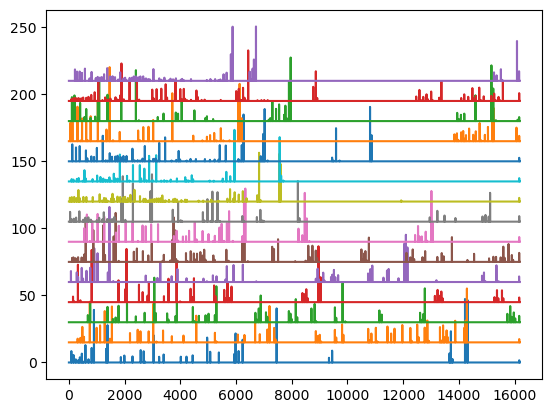

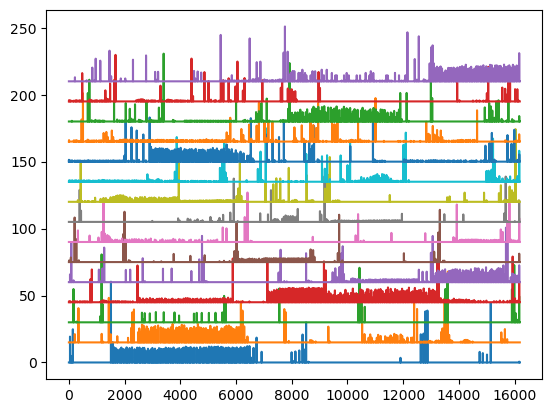

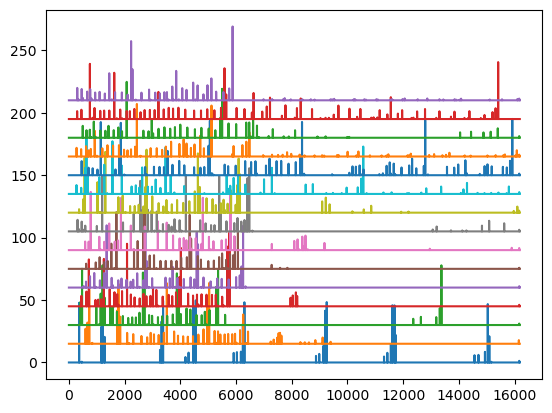

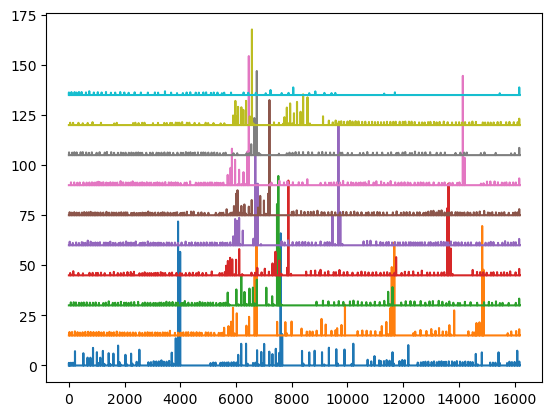

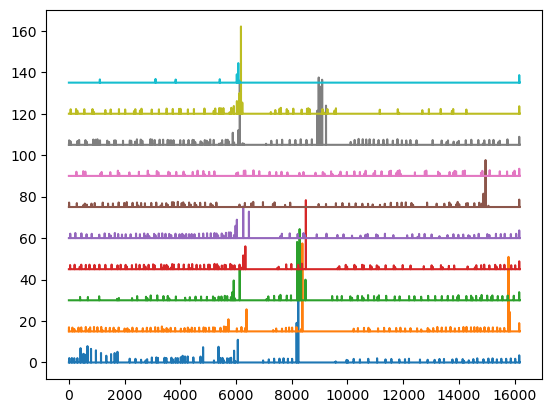

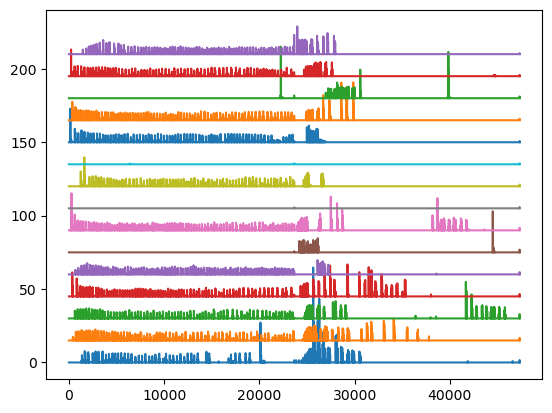

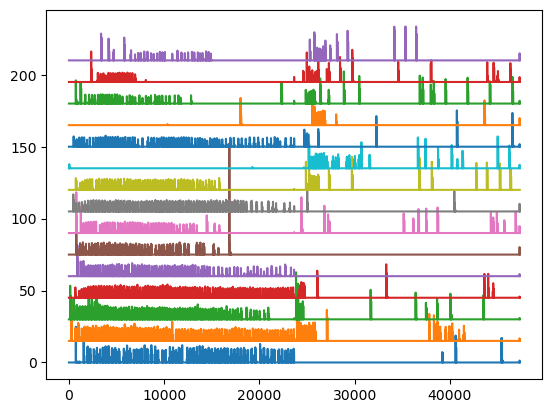

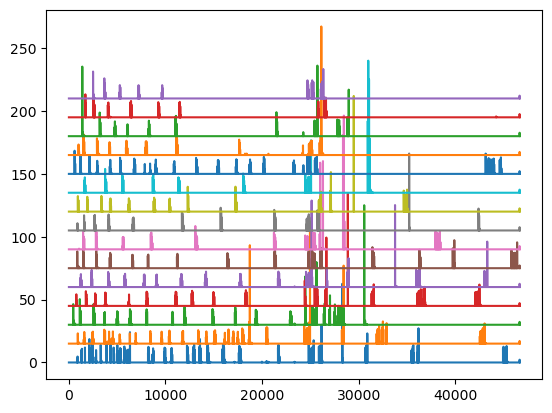

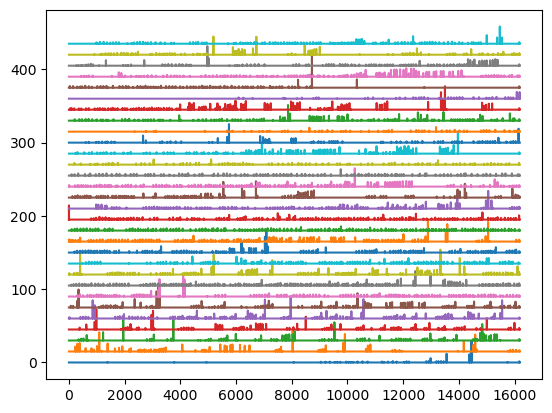

In [41]:
for i in range(len(filtered_pooled_ctrl['swims'])):
    plt.figure()
    for j in range(len(filtered_pooled_ctrl['swims'][i])):
        plt.plot(filtered_pooled_ctrl['swims'][i][j] + 15 * j)


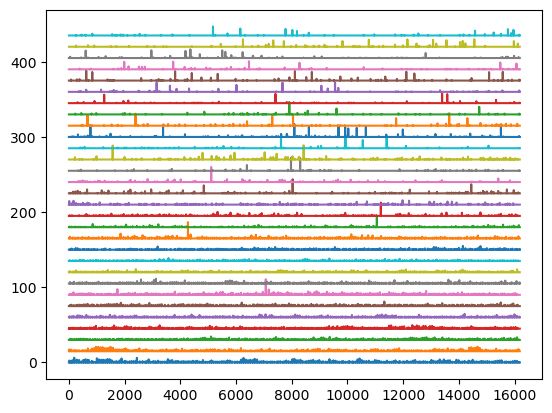

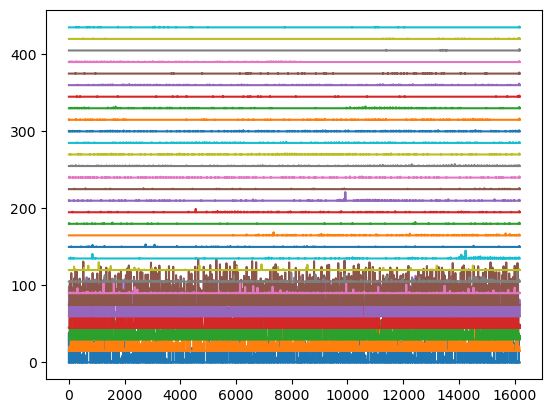

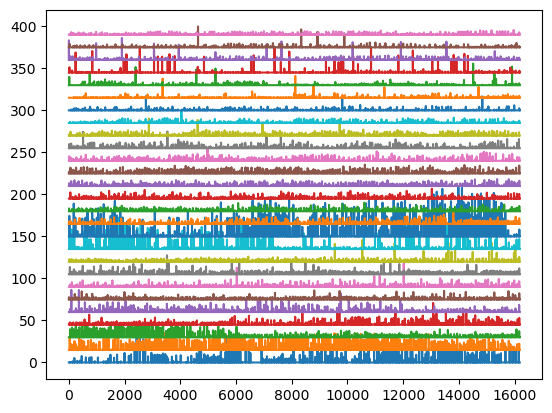

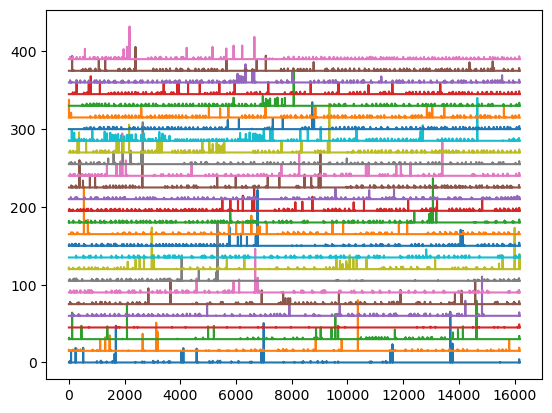

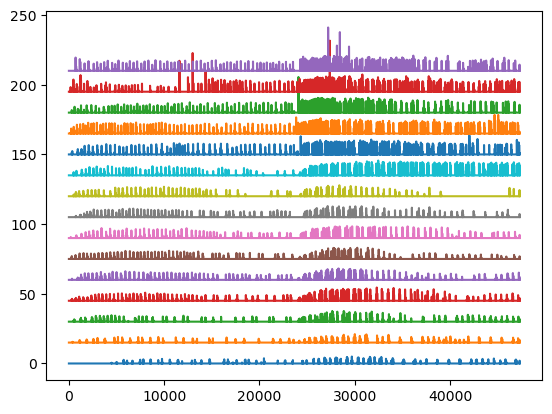

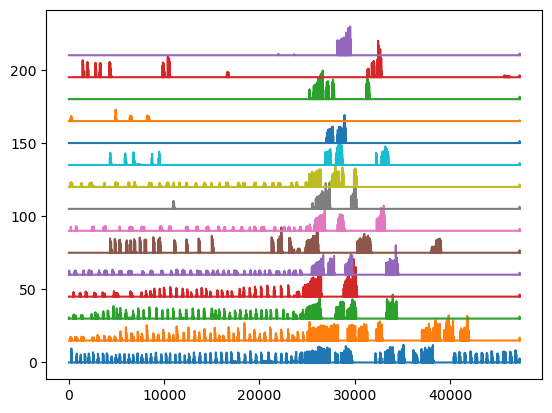

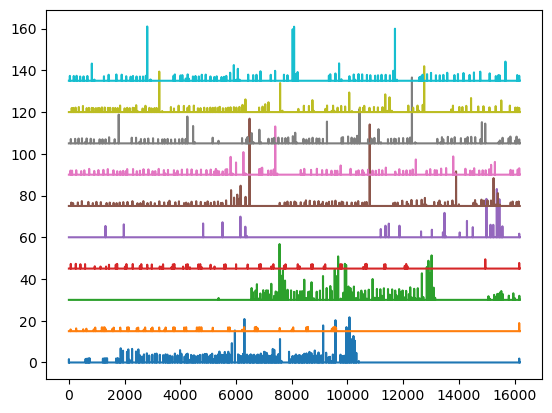

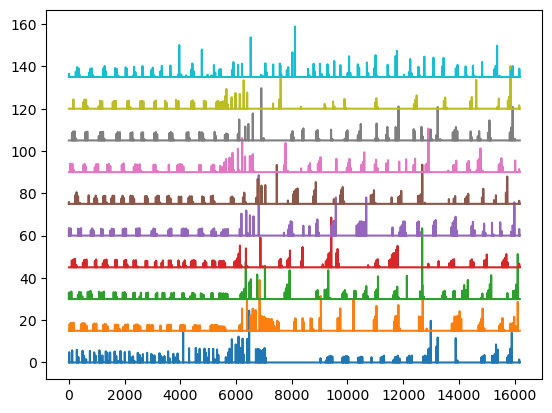

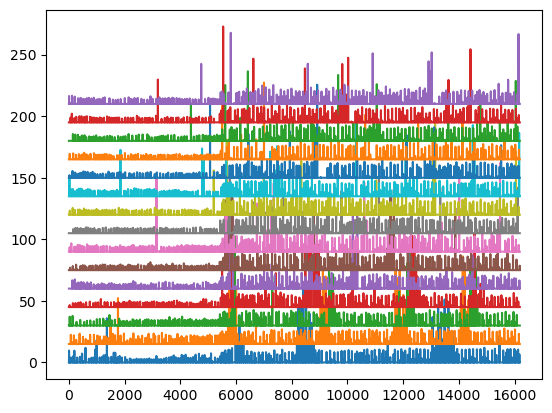

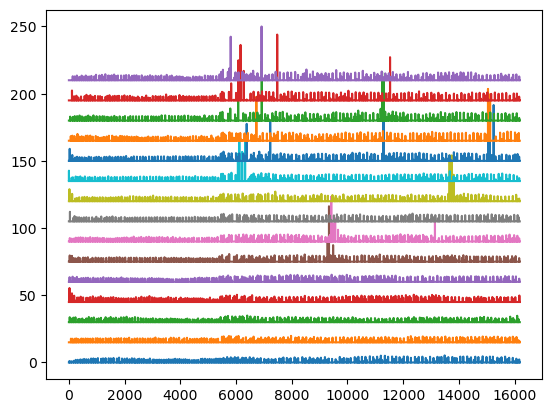

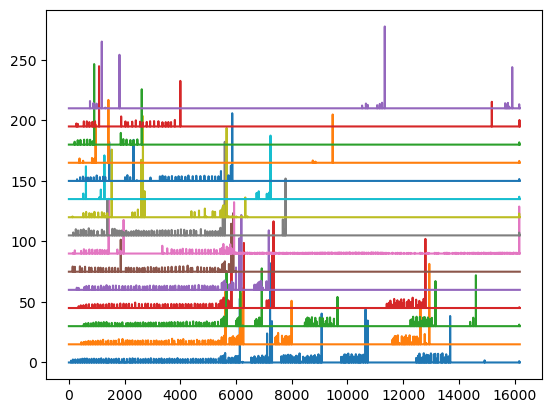

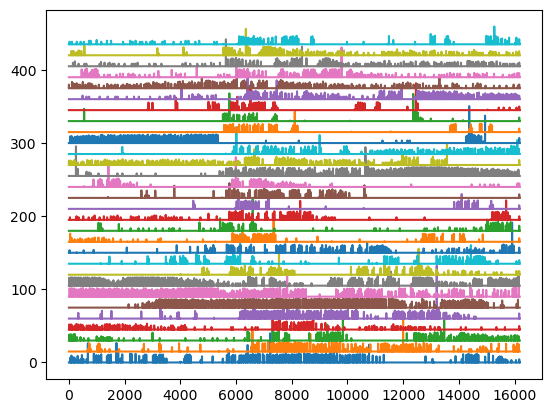

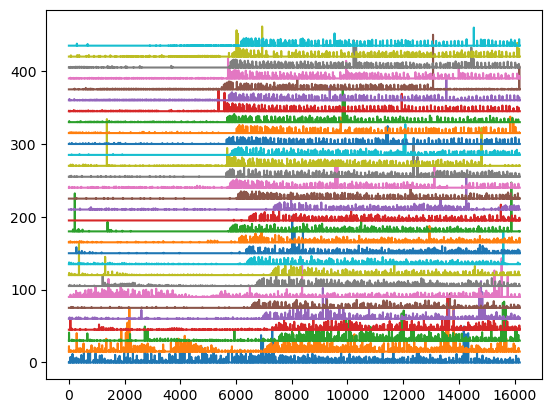

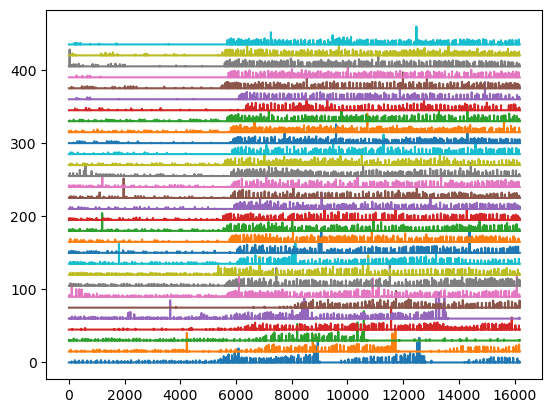

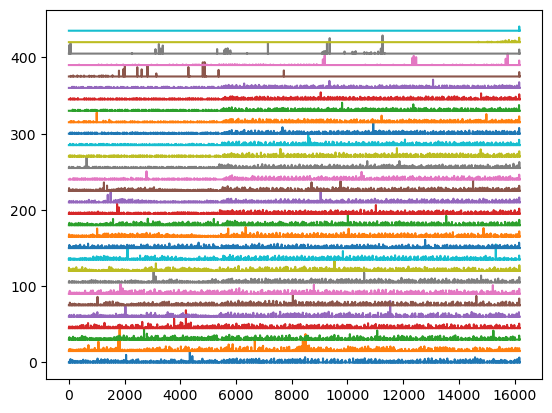

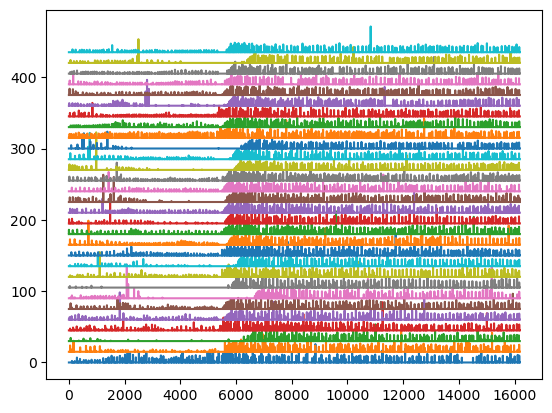

In [43]:
for i in range(len(filtered_pooled_ket['swims'])):
    plt.figure()
    for j in range(len(filtered_pooled_ket['swims'][i])):
        plt.plot(filtered_pooled_ket['swims'][i][j] + 15 * j)


In [44]:
#filtered_pooled_ctrl = np.load(r'C:\Users\14076\Documents\ketamine_expts\fig2\acute\behavior_07152022\proc\filtered_ctrl.npy',allow_pickle=True).item()
#filtered_pooled_ket = np.load(r'C:\Users\14076\Documents\ketamine_expts\fig2\acute\behavior_07152022\proc\filtered_tcb2.npy',allow_pickle=True).item()
for i in range(len(filtered_pooled_ctrl['swims'])):
    for j in range(len(filtered_pooled_ctrl['swims'][i])):
        maxFrame = len(filtered_pooled_ctrl['swims'][i][j])
        filtered_pooled_ctrl['times'][i][j] = np.append(filtered_pooled_ctrl['times'][i][j],maxFrame-1)
        #filtered_pooled_ctrl['swims'][i][j] = np.append(filtered_pooled_ctrl['swims'][i][j],1)x
for i in range(len(filtered_pooled_ket['swims'])):
    for j in range(len(filtered_pooled_ket['swims'][i])):
        maxFrame = len(filtered_pooled_ket['swims'][i][j])
        filtered_pooled_ket['times'][i][j] = np.append(filtered_pooled_ket['times'][i][j],maxFrame-1)
        #filtered_pooled_ket['swims'][i][j] = np.append(filtered_pooled_ket['swims'][i][j],1)

In [45]:
all_mags_k = np.zeros([len(filtered_pooled_ket['swims']),])
all_vars_k = np.zeros([len(filtered_pooled_ket['swims']),])
for i in range(len(filtered_pooled_ket['swims'])):
    frame_num = len(filtered_pooled_ket['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 400
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    numswims = []
    fish_cl_int = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_mags = []
    for j in range(len(filtered_pooled_ket['swims'][i])):
        cl_swim_inds = np.where(filtered_pooled_ket['times'][i][j] < cutoff)[0]
        cl_swims = filtered_pooled_ket['times'][i][j][cl_swim_inds]
        cl_mags = filtered_pooled_ket['swims'][i][j][cl_swims]
        for k in range(len(cl_mags)):
            fish_mags.append(cl_mags[k])
    all_mags_k[i] = np.mean(fish_mags)
    all_vars_k[i] = np.std(fish_mags)
    
    
all_mags_c = np.zeros([len(filtered_pooled_ctrl['swims']),])
all_vars_c = np.zeros([len(filtered_pooled_ctrl['swims']),])
for i in range(len(filtered_pooled_ctrl['swims'])):
    frame_num = len(filtered_pooled_ctrl['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff
        cl_len = cutoff / 300
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    numswims = []
    fish_cl_int = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_mags = []
    for j in range(len(filtered_pooled_ctrl['swims'][i])):
        cl_swim_inds = np.where(filtered_pooled_ctrl['times'][i][j] < cutoff)[0]
        cl_swims = filtered_pooled_ctrl['times'][i][j][cl_swim_inds]
        cl_mags = filtered_pooled_ctrl['swims'][i][j][cl_swims]
        for k in range(len(cl_mags)):
            fish_mags.append(cl_mags[k])
    all_mags_c[i] = np.mean(fish_mags)
    all_vars_c[i] = np.std(fish_mags)


In [46]:
passive_times = {}
passive_times['passive'] = []
passive_times['fish'] = []
passive_times['condition'] = []
passive_times['swim_mag'] = []
passive_times['cl_rate'] = []
passive_times['cl_mag'] = []
passive_times['passive_cl'] = []
mean_passive = []
mean_passive_k = []
mean_passive_k_cl = []
mean_cl_rate_k = []
mean_ol_rate_k = []
mean_passive_c = []
mean_passive_c_cl = []
mean_cl_rate_c = []
mean_ol_rate_c = []
mean_cl_int_c = []
mean_cl_int_k = []
mean_ol_int_c = []
mean_ol_int_k = []
mean_ol_struggle_c = []
mean_ol_struggle_k = []
passivethresh = 5
struggle_cutoff = 2.5
for i in range(len(filtered_pooled_ket['swims'])):
    frame_num = len(filtered_pooled_ket['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff * 2
        cl_len = cutoff / 300
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    numswims = []
    fish_passive = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_passive_cl = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_cl_rate = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_ol_rate = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_cl_int = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_ol_int = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_ol_struggle = np.zeros([len(filtered_pooled_ket['times'][i]),])
    for j in range(len(filtered_pooled_ket['times'][i])):
        ol_swim_inds = np.where(filtered_pooled_ket['times'][i][j] > cutoff)[0]
        cl_swim_inds = np.where(filtered_pooled_ket['times'][i][j] < cutoff)[0]
        ol_swims = filtered_pooled_ket['times'][i][j][ol_swim_inds]
        ol_swims = np.insert(ol_swims,0,cutoff)
        ol_mags = filtered_pooled_ket['swims'][i][j][ol_swims]
        cl_swims = filtered_pooled_ket['times'][i][j][cl_swim_inds]
        ol_swims2 = ol_swims[0:(len(ol_swims)-1)]
        ol_int = np.mean(filtered_pooled_ket['swims'][i][j][ol_swims])
        cl_int = np.mean(filtered_pooled_ket['swims'][i][j][cl_swims])
        cl_var = np.std(filtered_pooled_ket['swims'][i][j][cl_swims])
        ol_struggles = ol_mags[np.where(ol_mags>(all_mags_k[i] + struggle_cutoff*all_vars_k[i]))]
        isis = np.diff(ol_swims)
        isis_cl = np.diff(cl_swims)
        
        if (frame_num > 20000):
            passive_cutoff = passivethresh*300
        else:
            passive_cutoff = passivethresh*90
        isis_cl_p = isis_cl[np.where(isis_cl>passive_cutoff)]
        
        if (len(isis)==0):
            passivetime = ol_flength
        else:
            isis = isis[np.where(isis>passive_cutoff)]
            passivity_onset_inds = np.where(isis>passive_cutoff)
            passivetime = np.sum(isis)
        if (len(isis_cl)==0):
            passivetime_cl = cutoff
        else:
            firstcl = cl_swims[0]
            lastcl = cl_swims[-1]
            passivetime_cl = np.sum(isis_cl_p)
        
        passive_times['passive'].append(passivetime/ol_flength)
        passive_times['fish'].append(i)
        passive_times['condition'].append('ket')
        passive_times['cl_rate'].append(len(cl_swim_inds))
        passive_times['passive_cl'].append(passivetime_cl/cutoff)
        passive_times['swim_mag'].append(ol_int)
        fish_passive[j] = passivetime/ol_flength
        fish_passive_cl[j] = passivetime_cl/cl_len
        fish_cl_rate[j] = len(cl_swim_inds)/cl_len
        fish_ol_rate[j] = len(ol_swim_inds)/ol_len
        fish_ol_int[j] = np.mean(ol_int)
        fish_cl_int[j] = np.mean(cl_int)
        fish_ol_struggle[j] = len(ol_struggles)/len(ol_swim_inds)
    mean_passive_k.append(np.mean(fish_passive))
    mean_passive_k_cl.append(np.mean(fish_passive_cl))
    mean_cl_rate_k.append(np.mean(fish_cl_rate))
    mean_ol_rate_k.append(np.mean(fish_ol_rate))
    mean_cl_int_k.append(np.mean(fish_cl_int))
    mean_ol_int_k.append(np.mean(fish_ol_int))
    mean_ol_struggle_k.append(np.mean(fish_ol_struggle))
mean_passive.append(mean_passive_k)
for i in range(len(filtered_pooled_ctrl['swims'])):
    frame_num = len(filtered_pooled_ctrl['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff * 2
        cl_len = cutoff / 300
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    
    numswims = []
    fish_passive = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_passive_cl = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_cl_rate = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_ol_rate = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_cl_int = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_ol_int = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_ol_struggle = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    for j in range(len(filtered_pooled_ctrl['times'][i])):
        ol_swim_inds = np.where(filtered_pooled_ctrl['times'][i][j] > cutoff)[0]
        ol_swims = filtered_pooled_ctrl['times'][i][j][ol_swim_inds]
        ol_swims = np.insert(ol_swims,0,cutoff)
        ol_mags = filtered_pooled_ctrl['swims'][i][j][ol_swims]
        cl_swim_inds = np.where(filtered_pooled_ctrl['times'][i][j] < cutoff)[0]
        cl_swims = filtered_pooled_ctrl['times'][i][j][cl_swim_inds]
        ol_int = np.mean(filtered_pooled_ctrl['swims'][i][j][ol_swims])
        cl_int = np.mean(filtered_pooled_ctrl['swims'][i][j][cl_swims])
        cl_var = np.std(filtered_pooled_ctrl['swims'][i][j][cl_swims])
        ol_struggles = ol_swims[np.where(ol_mags>(all_mags_c[i] + struggle_cutoff * all_vars_c[i]))]
        isis = np.diff(ol_swims)
        isis_cl = np.diff(cl_swims)
        if (frame_num > 20000):
            passive_cutoff = passivethresh*300
        else:
            passive_cutoff = passivethresh*90
        
        isis_cl_p = isis_cl[np.where(isis_cl>passive_cutoff)]
        if (len(isis_cl)==0):
            passivetime_cl = cutoff
        else:
            firstcl = cl_swims[0]
            lastcl = cl_swims[-1]
            passivetime_cl = np.sum(isis_cl_p)
       
        if (len(isis)==0):
            passivetime = ol_flength
        else:
            isis = isis[np.where(isis>passive_cutoff)]
            passivetime = np.sum(isis)
        passive_times['passive'].append(passivetime/ol_flength)
        passive_times['fish'].append(i)
        passive_times['condition'].append('ctrl')
        passive_times['cl_rate'].append(len(cl_swim_inds))
        passive_times['passive_cl'].append(passivetime_cl/cutoff)
        passive_times['swim_mag'].append(ol_int)
        fish_passive[j] = passivetime/ol_flength
        fish_passive_cl[j] = passivetime_cl/cutoff*100
        fish_cl_rate[j] = len(cl_swim_inds)/cl_len
        fish_ol_rate[j] = len(ol_swim_inds)/ol_len
        fish_ol_int[j] = np.mean(ol_int)
        fish_cl_int[j] = np.mean(cl_int)
        fish_ol_struggle[j] = len(ol_struggles)/len(ol_swims)
    mean_passive_c.append(np.mean(fish_passive))
    mean_passive_c_cl.append(np.mean(fish_passive_cl))
    mean_cl_rate_c.append(np.mean(fish_cl_rate))
    mean_ol_rate_c.append(np.mean(fish_ol_rate))
    mean_cl_int_c.append(np.mean(fish_cl_int))
    mean_ol_int_c.append(np.mean(fish_ol_int))
    mean_ol_struggle_c.append(np.mean(fish_ol_struggle))
mean_passive.append(mean_passive_c)

/Users/marc/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/marc/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/marc/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/marc/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/marc/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [47]:
summary = {}
summary['condition'] = []
summary['passive'] = []
summary_cl = {}
summary_cl['condition'] = []
summary_cl['passive'] = []
summary_cl['rate'] = []
summary_cl['int_cl'] = []
summary_cl['int_ol'] = []
summary_cl['rate_ol'] = []
summary_cl['struggle_rate'] = []
passive_cl_ol = {}
passive_cl_ol['condition'] = []
passive_cl_ol['passive'] = []
for i in range(len(mean_passive_c)):
    summary['condition'].append('control')
    summary['passive'].append(mean_passive_c[i])
    summary_cl['condition'].append('control')
    summary_cl['passive'].append(mean_passive_c_cl[i])
    summary_cl['rate'].append(mean_cl_rate_c[i])
    summary_cl['rate_ol'].append(mean_ol_rate_c[i])
    summary_cl['int_cl'].append(mean_cl_int_c[i])
    summary_cl['int_ol'].append(mean_ol_int_c[i])
    summary_cl['struggle_rate'].append(mean_ol_struggle_c[i])
    passive_cl_ol['passive'].append(mean_passive_c_cl[i])
    passive_cl_ol['condition'].append('cl')
for i in range(len(mean_passive_k)):
    summary['condition'].append('ketamine')
    summary['passive'].append(mean_passive_k[i])
    summary_cl['condition'].append('ketamine')
    summary_cl['passive'].append(mean_passive_k_cl[i])
    summary_cl['rate'].append(mean_cl_rate_k[i])
    summary_cl['rate_ol'].append(mean_ol_rate_k[i])
    summary_cl['int_cl'].append(mean_cl_int_k[i])
    summary_cl['int_ol'].append(mean_ol_int_k[i])
    summary_cl['struggle_rate'].append(mean_ol_struggle_k[i])

In [48]:
from scipy.stats import mannwhitneyu

/var/folders/5w/6ptxpys52px1q84g227h71p00000gn/T/ipykernel_74329/840506934.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sb.barplot(data=summary, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)


<Axes: xlabel='condition', ylabel='share passive time'>

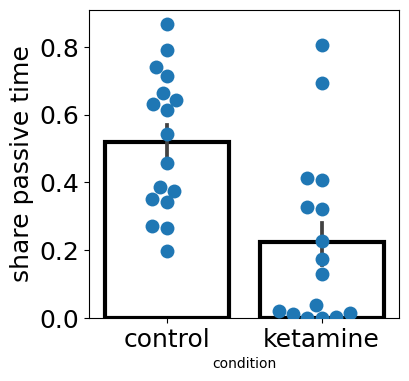

In [49]:
plt.figure(figsize=(4,4))

plt.ylabel('share passive time',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.barplot(data=summary, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
sb.swarmplot(data=summary, x="condition",y="passive",size=10)
#plt.savefig(r'G:\My Drive\20230913_suramin\proc\passivity.svg',dpi=300)

In [ ]:
#save open loop stats
pd.DataFrame(summary).to_csv(r'')

In [ ]:
#save closed loop stats
pd.DataFrame(summary_cl).to_csv(r'')

In [56]:
passive_cl_ol = {}
passive_cl_ol['condition'] = []
passive_cl_ol['passive'] = []
for i in range(len(mean_passive_c_cl)):
    passive_cl_ol['passive'].append(mean_passive_c_cl[i])
    passive_cl_ol['condition'].append('ctrl_cl')
for i in range(len(mean_passive_k_cl)):
    passive_cl_ol['passive'].append(mean_passive_k_cl[i])
    passive_cl_ol['condition'].append('ket_cl')
for i in range(len(mean_passive_c)):
    passive_cl_ol['passive'].append(mean_passive_c[i]*100)
    passive_cl_ol['condition'].append('ctrl_ol')
for i in range(len(mean_passive_k)):
    passive_cl_ol['passive'].append(mean_passive_k[i]*100)
    passive_cl_ol['condition'].append('ket_ol')

In [57]:
summary_stats = {}
summary_stats['cl_passivity'] = []
summary_stats['ol_passivity'] = []
summary_stats['cl_vigor'] = []
summary_stats['ol_vigor'] = []
for i in range(len(mean_passive_c)):
    summary_stats['cl_passivity'].append(mean_passive_c_cl[i])
    summary_stats['ol_passivity'].append(mean_passive_c[i]*100)
    summary_stats['cl_vigor'].append(summary_cl['int_cl'][i])
    summary_stats['ol_vigor'].append(summary_cl['int_ol'][i])

/var/folders/5w/6ptxpys52px1q84g227h71p00000gn/T/ipykernel_74329/1899491065.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sb.barplot(data=passive_cl_ol, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
/Users/marc/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='condition', ylabel='share passive time'>

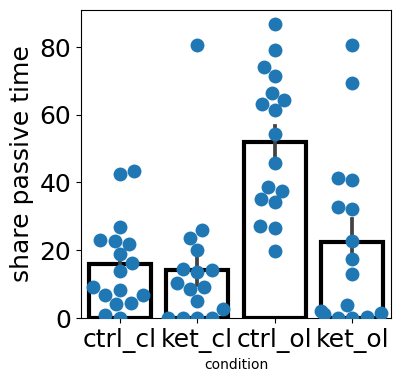

In [58]:
plt.figure(figsize=(4,4))

plt.ylabel('share passive time',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.barplot(data=passive_cl_ol, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
sb.swarmplot(data=passive_cl_ol, x="condition",y="passive",size=10)

#plt.savefig(r'G:\My Drive\20230913_suramin\proc\passivity.svg',dpi=300)

[]

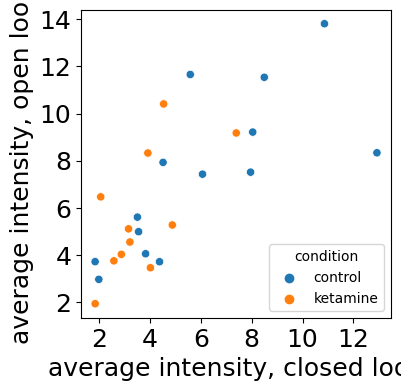

In [59]:
plt.figure(figsize=(4,4))
plt.ylabel('average intensity, open loop',fontsize=18)
plt.xlabel('average intensity, closed loop',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.scatterplot(data=summary_cl, x="int_cl",y="int_ol",hue = "condition")
#plt.plot(np.linspace(0,15),np.linspace(0,15),'--',color = [0.5,0.5,0.5,1])
plt.plot()